In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv("Housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [77]:
df.shape

(20640, 10)

In [78]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [79]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [80]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [81]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


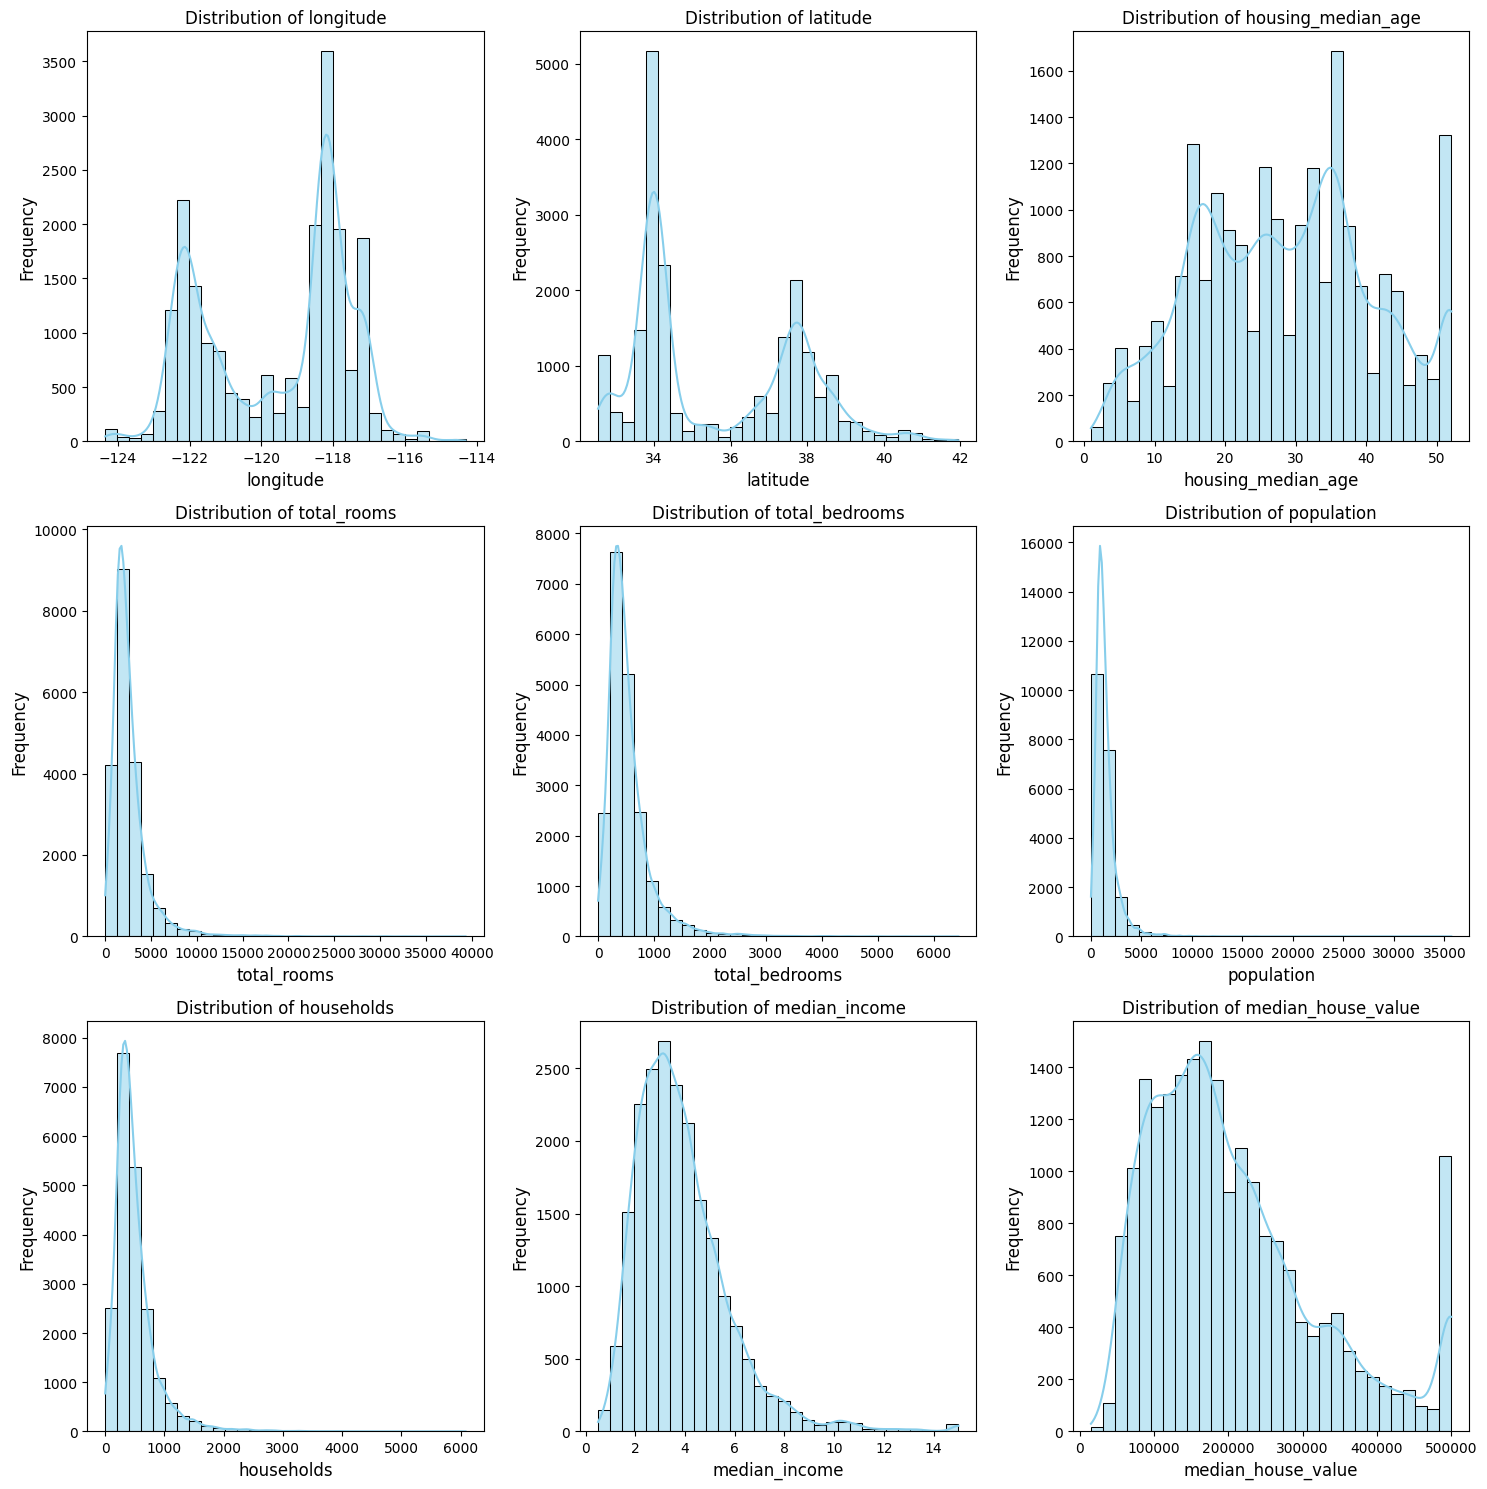

In [83]:

def plotDistributionOfColumns(df, plotSize=15, textSize=12):
    # Lọc các cột số trong DataFrame
    df = df.select_dtypes(include=[np.number])
    
    # Số lượng các cột cần vẽ
    nCols = len(df.columns)
    
    # Xác định số hàng và số cột cho biểu đồ
    nRows = (nCols // 3) + (nCols % 3 > 0)  # 3 biểu đồ mỗi hàng
    
    # Tạo hình vẽ
    plt.figure(figsize=(plotSize, nRows * 5))
    
    # Vẽ histogram cho từng cột
    for i, column in enumerate(df.columns):
        plt.subplot(nRows, 3, i + 1)
        sns.histplot(df[column], kde=True, color='skyblue', bins=30)
        plt.title(f'Distribution of {column}', fontsize=textSize)
        plt.xlabel(f'{column}', fontsize=textSize)
        plt.ylabel('Frequency', fontsize=textSize)
    
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

# Gọi hàm để vẽ sự phân bố của tất cả các cột
plotDistributionOfColumns(df, plotSize=15, textSize=12)


# Sự  tương quan của dữ liệu 

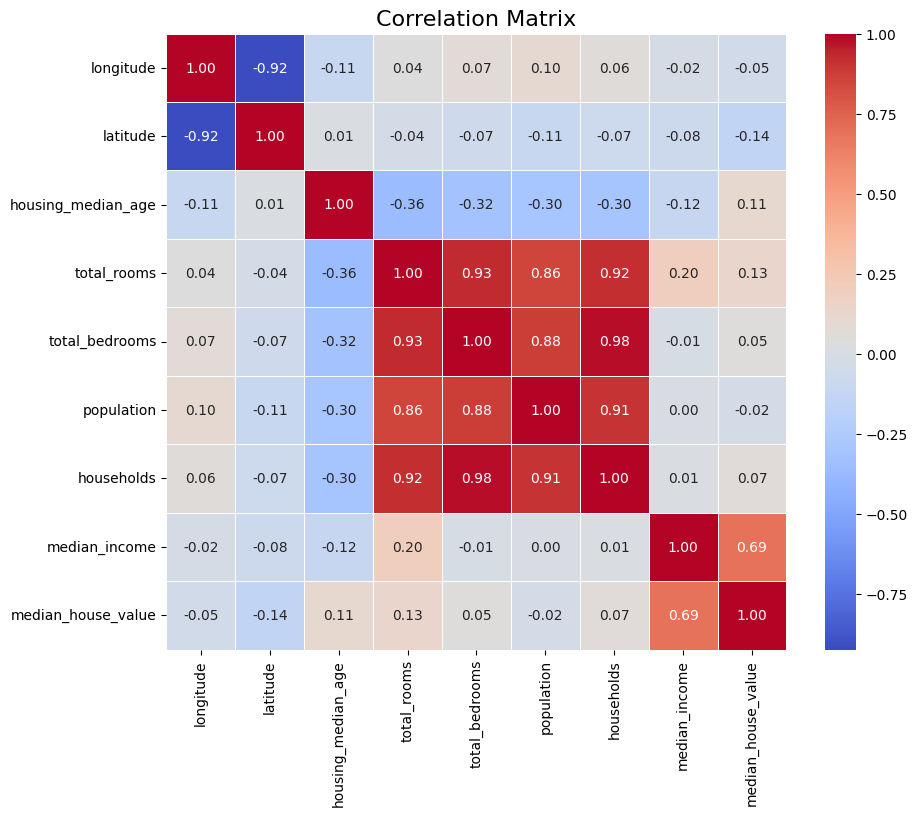

In [84]:
# C1 lọc các cột là numeric
# Lọc các cột có kiểu số
df_numeric = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan
corr_matrix = df_numeric.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


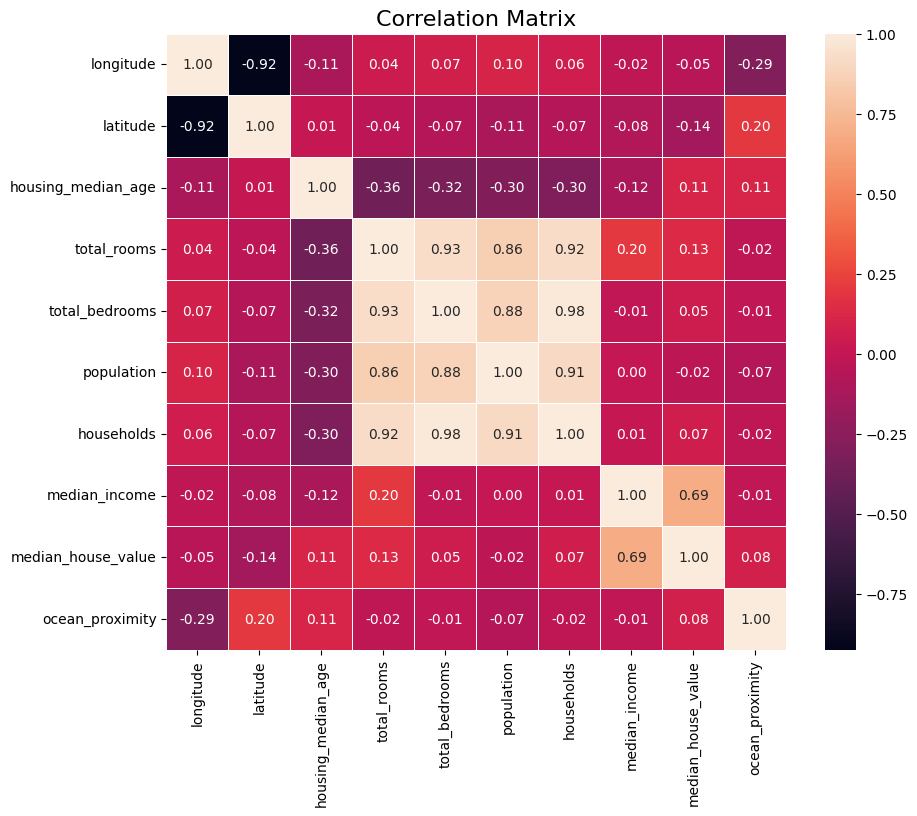

In [85]:
# Cách 2: Xử lý dữ liệu chuỗi (Nếu có thể chuyển đổi thành số)
from sklearn.preprocessing import LabelEncoder

# Chuyển đổi tất cả các cột kiểu chuỗi thành số (nếu cần thiết)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Tính toán ma trận tương quan
corr_matrix = df.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()



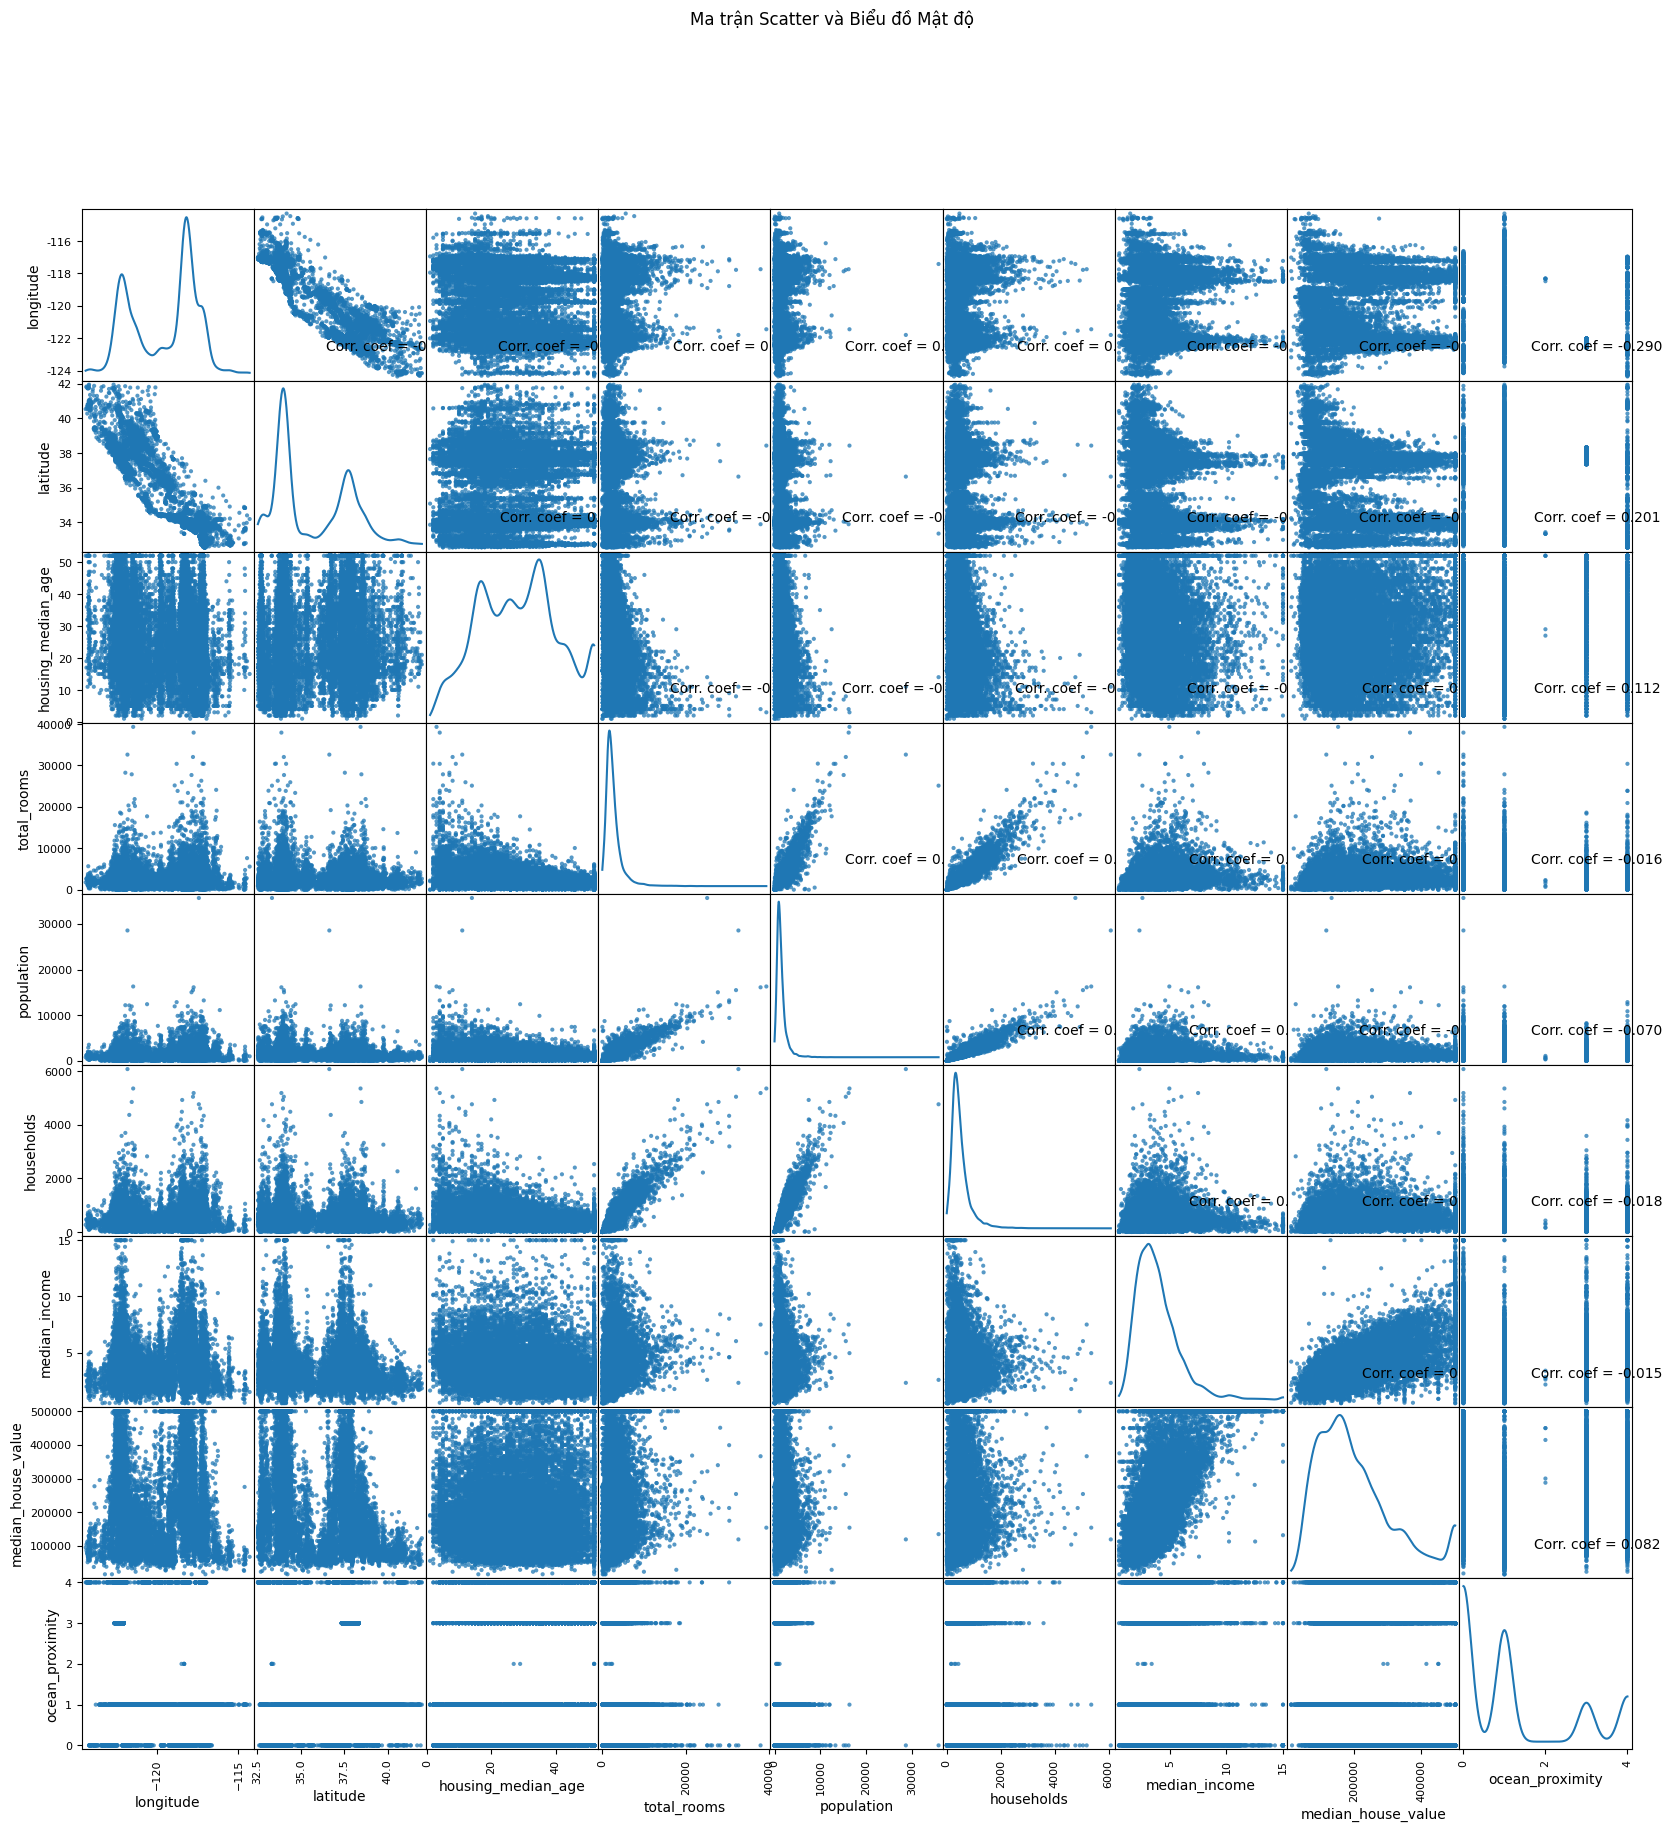

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm vẽ ma trận scatter và biểu đồ mật độ
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Chỉ giữ lại các cột có kiểu dữ liệu số
    # Loại bỏ các cột có giá trị thiếu
    df = df.dropna(axis=1)  # Loại bỏ các cột có giá trị thiếu
    df = df[[col for col in df if df[col].nunique() > 1]]  # Chỉ giữ lại các cột có nhiều hơn 1 giá trị duy nhất
    columnNames = list(df)
    
    # Nếu có quá 10 cột, giảm số cột lại để tránh tính toán quá tải khi vẽ các biểu đồ mật độ
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    
    df = df[columnNames]
    
    # Vẽ ma trận scatter
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    
    # Tính toán hệ số tương quan và ghi chú lên các biểu đồ
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    # Tiêu đề cho biểu đồ
    plt.suptitle('Ma trận Scatter và Biểu đồ Mật độ')
    plt.show()

# Gọi hàm vẽ ma trận scatter
plotScatterMatrix(df, 20, 10)


In [87]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [88]:
df.isna().sum()
# Thay thế giá trị thiếu trong total_bedrooms bằng giá trị trung vị (median)
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Kiểm tra lại các giá trị thiếu
df.isnull().sum()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18836\3007767739.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

# Chọn các cột đặc trưng (features) và mục tiêu (target)
X = df.drop('median_house_value', axis=1)  # Các đặc trưng
y = df['median_house_value']  # Mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X train :{X_train.shape}")
print(f"y train :{y_train.shape}")
print(f"X test :{X_test.shape}")
print(f"y test :{y_test.shape}")

X train :(16512, 9)
y train :(16512,)
X test :(4128, 9)
y test :(4128,)


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import xgboost as xgb
import pandas as pd

# Hàm huấn luyện nhiều mô hình và đánh giá, thêm bước fine-tuning cho mô hình tốt nhất
def train_evaluate_and_tune_models(X, y, models, test_size=0.2, random_state=42):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Dùng để lưu trữ kết quả
    results = {}

    # Huấn luyện và đánh giá tất cả các mô hình
    for name, model in models.items():
        # Huấn luyện mô hình
        model.fit(X_train, y_train)
        
        # Dự đoán giá trị trên tập kiểm tra
        y_pred = model.predict(X_test)
        
        # Đánh giá mô hình
        mae = mean_absolute_error(y_test, y_pred)  # MAE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
        r2 = r2_score(y_test, y_pred)  # R-squared
        
        # Lưu kết quả vào dictionary
        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        }

    # Chuyển kết quả thành DataFrame để hiển thị
    results_df = pd.DataFrame(results).T

    # In ra bảng kết quả
    print("Model Comparison Results:")
    print(results_df)
    
    # Xác định mô hình tốt nhất
    best_model_name = results_df['R2'].idxmax()
    print(f"\nBest Model: {best_model_name}")
    
    # Fine-tuning mô hình tốt nhất
    best_model = models[best_model_name]
    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    elif best_model_name == 'XGBoost':
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    else:
        param_grid = {}

    # Nếu có param_grid, thực hiện GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        print(f"\nBest parameters for {best_model_name}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_

    # Dự đoán lại với mô hình đã fine-tuned
    y_pred_tuned = best_model.predict(X_test)

    # Đánh giá mô hình đã fine-tuned
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
    r2_tuned = r2_score(y_test, y_pred_tuned)

    print(f"\nFine-Tuned Model Performance:")
    print(f"MAE: {mae_tuned}")
    print(f"RMSE: {rmse_tuned}")
    print(f"R-squared: {r2_tuned}")
    
    # Trả về mô hình tốt nhất và kết quả
    return best_model_name, results_df, best_model

# Các mô hình để thử nghiệm
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression (SVR)': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

# Gọi hàm với dữ liệu của bạn
best_model_name, results_df, best_model = train_evaluate_and_tune_models(X, y, models)


Model Comparison Results:
                                          MAE           RMSE        R2
Linear Regression                51820.748150   71147.871461  0.613707
Ridge Regression                 51818.613368   71144.005216  0.613749
Lasso Regression                 51820.478222   71147.177177  0.613714
Random Forest                    31869.913447   49628.832151  0.812042
Gradient Boosting                38644.713464   56256.031210  0.758492
Support Vector Regression (SVR)  87107.608710  116972.081046 -0.044137
K-Nearest Neighbors              40821.040262   61343.633326  0.712835
XGBoost                          32137.681094   48354.408037  0.821571

Best Model: XGBoost

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Fine-Tuned Model Performance:
MAE: 30493.51537612797
RMSE: 46573.58499895826
R-squared: 0.8344716149177336


# Predict data bằng bộ test coi độ hiệu quả của nó


         Actual      Predicted
20046   47700.0   49776.238281
3024    45800.0   75310.429688
15663  500001.0  492789.312500
20484  218600.0  257166.171875
9814   278000.0  269067.125000
Mean Absolute Error (MAE): 32137.68109414744
Root Mean Squared Error (RMSE): 48354.40803736545
R-squared: 0.8215710655628462


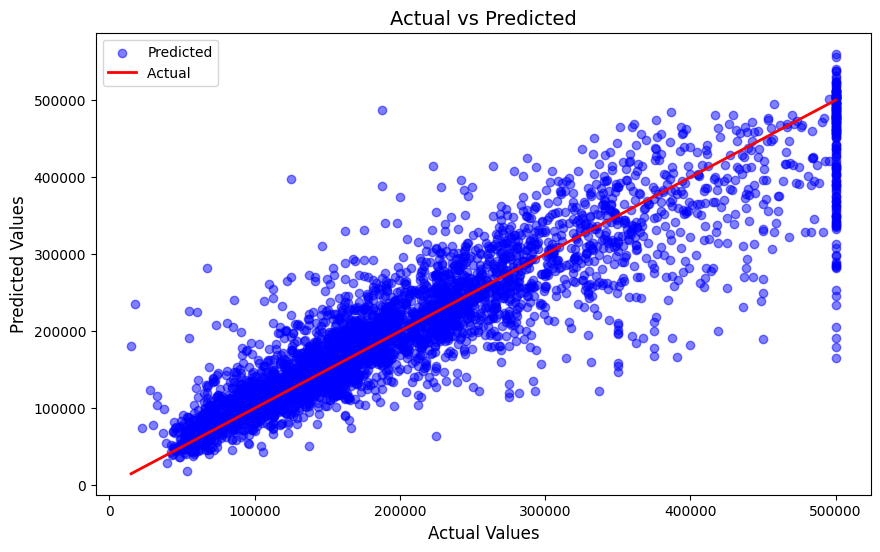

In [104]:
# Sau khi huấn luyện mô hình và có X_test, y_test (tập kiểm tra)

# Dự đoán giá trị trên tập kiểm tra
y_pred = model.predict(X_test)

# In ra một số giá trị thực tế và dự đoán để so sánh
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Hiển thị một số ví dụ so sánh
print(comparison_df.head())

# Tính toán một số chỉ số để đánh giá độ trùng khớp
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Nếu bạn muốn kiểm tra trực quan sự trùng khớp, bạn có thể vẽ biểu đồ dự đoán so với thực tế
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))

# Vẽ scatter plot với màu sắc cho giá trị dự đoán
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')

# Vẽ đường chéo (y = x) với màu đỏ
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual ')

# Tiêu đề và nhãn cho trục
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted", fontsize=14)

# Thêm chú thích cho biểu đồ
plt.legend()

# Hiển thị biểu đồ
plt.show()